In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
#Leemos el df

df = pd.read_csv(r'encuesta.csv', delimiter=r'\s+', engine='python', on_bad_lines='skip')
print(df.shape)
df.head()

(30007, 172)


Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  screensize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           1   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           2   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           2   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           2   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize       major  
0           2        None  
1           4        None  
2           3        None  
3           5     biology  
4           4  Psychology  

[5 rows x 172 columns]

In [3]:
#Separacion de datos en distintos DFs para poder trabajar con ellos

preguntas = df.iloc[:, :126]    #Cuestionario del DASS

tipi = df.iloc[:, 131:141]      #10-items personality inventory

lapse = df.iloc[:, 126:131]     #columna de tiempo que se tarda en responder la encuesta

vlc = df.iloc[:, 141:157]       #palabras para evaluación cognitiva, dentro de contexto educativo y de atención al cuestionario

demograficos = df.iloc[:, 157:] #datos demográficos

In [4]:
listaA = []
for n in range(1, 43):
    nombre_col = f'Q{n}A'
    listaA.append(nombre_col)
    
listaI = []
for n in range(1, 43):
    nombre_col = f'Q{n}I'
    listaI.append(nombre_col)

listaE = []
for n in range(1, 43):
    nombre_col = f'Q{n}E'
    listaE.append(nombre_col)

print(listaA)
print(listaI)
print(listaE)
print('\n')

preguntas_A = preguntas.copy()
preguntas_A = preguntas_A.drop(listaE, axis = 1)
preguntas_A = preguntas_A.drop(listaI, axis = 1)

print(preguntas_A.sample(4))
print('\n')

preguntas_I = preguntas.copy()
preguntas_I = preguntas_I.drop(listaA, axis = 1)
preguntas_I = preguntas_I.drop(listaE, axis = 1)

print(preguntas_I.sample(4))
print('\n')

preguntas_E = preguntas.copy()
preguntas_E = preguntas_E.drop(listaA, axis = 1)
preguntas_E = preguntas_E.drop(listaI, axis = 1)

print(preguntas_E.sample(4))
print('\n')

['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A']
['Q1I', 'Q2I', 'Q3I', 'Q4I', 'Q5I', 'Q6I', 'Q7I', 'Q8I', 'Q9I', 'Q10I', 'Q11I', 'Q12I', 'Q13I', 'Q14I', 'Q15I', 'Q16I', 'Q17I', 'Q18I', 'Q19I', 'Q20I', 'Q21I', 'Q22I', 'Q23I', 'Q24I', 'Q25I', 'Q26I', 'Q27I', 'Q28I', 'Q29I', 'Q30I', 'Q31I', 'Q32I', 'Q33I', 'Q34I', 'Q35I', 'Q36I', 'Q37I', 'Q38I', 'Q39I', 'Q40I', 'Q41I', 'Q42I']
['Q1E', 'Q2E', 'Q3E', 'Q4E', 'Q5E', 'Q6E', 'Q7E', 'Q8E', 'Q9E', 'Q10E', 'Q11E', 'Q12E', 'Q13E', 'Q14E', 'Q15E', 'Q16E', 'Q17E', 'Q18E', 'Q19E', 'Q20E', 'Q21E', 'Q22E', 'Q23E', 'Q24E', 'Q25E', 'Q26E', 'Q27E', 'Q28E', 'Q29E', 'Q30E', 'Q31E', 'Q32E', 'Q33E', 'Q34E', 'Q35E', 'Q36E', 'Q37E', 'Q38E', 'Q39E', 'Q40E', 'Q41E', 'Q42E']


       Q1A  Q2

In [5]:
preguntas_A.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  Q33A  Q34A  Q35A  \
0    4    4    2    4    4    4    4    4    2     1  ...     2     3     4   
1    4    1    2    3    4    4    3    4    3     2  ...     3     2     2   
2    3    1    4    1    4    3    1    3    2     4  ...     1     4     3   
3    2    3    2    1    3    3    4    2    3     3  ...     2     4     1   
4    2    2    3    4    4    2    4    4    4     3  ...     4     4     3   

   Q36A  Q37A  Q38A  Q39A  Q40A  Q41A  Q42A  
0     4     1     2     4     3     4     4  
1     3     4     2     2     1     2     2  
2     4     4     4     2     2     1     4  
3     1     2     1     3     4     4     2  
4     4     3     3     3     4     4     3  

[5 rows x 42 columns]

## Matriz de correlación de Pearson
- Mide la relación lineal entre 2 variables.

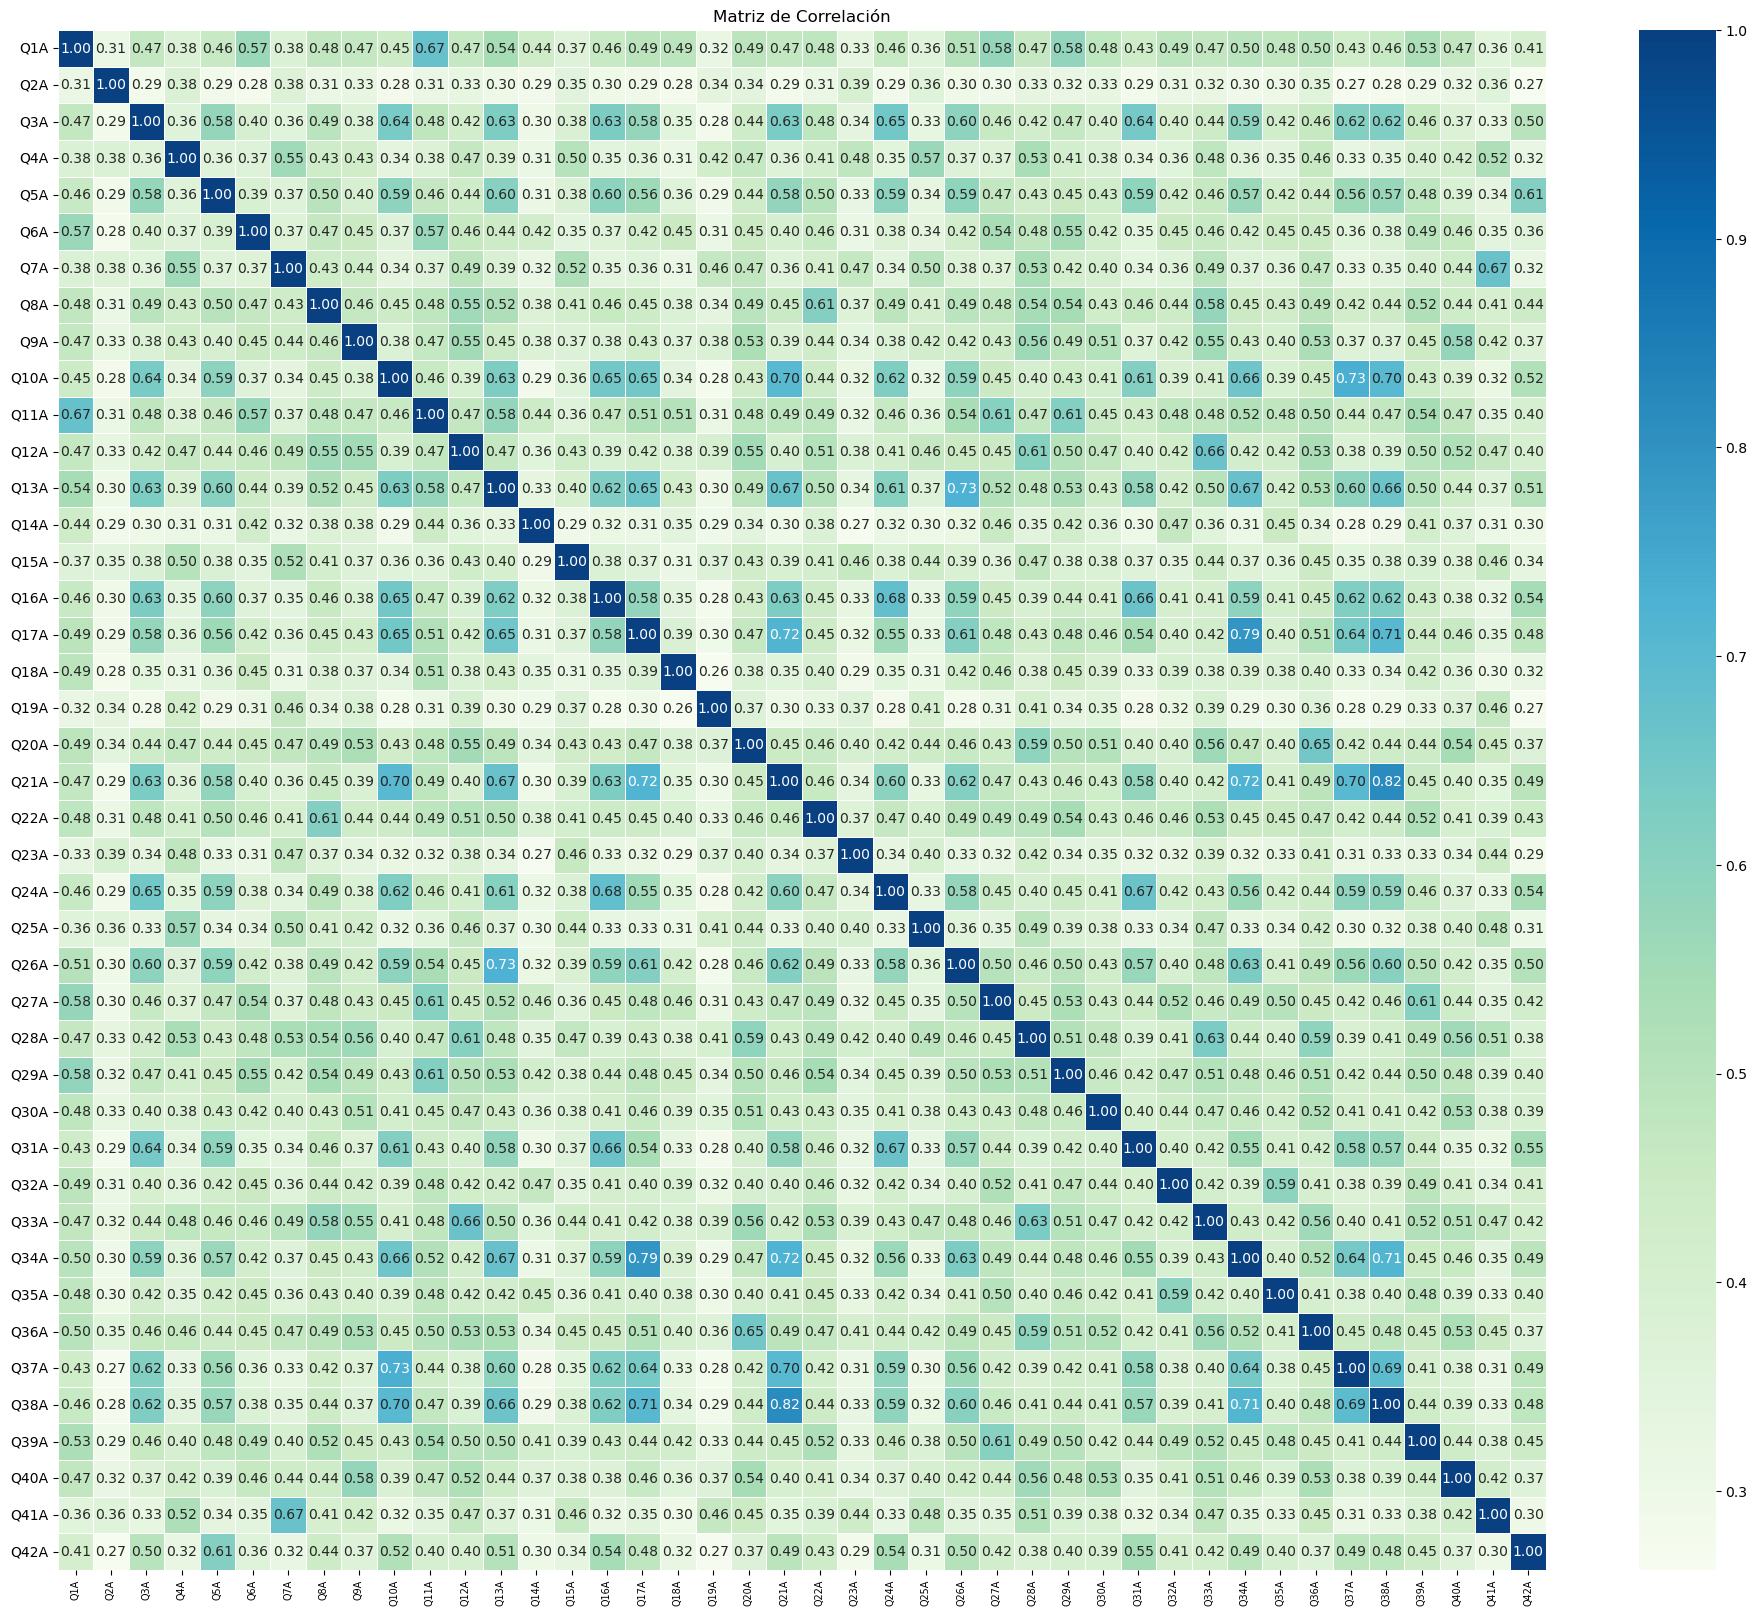

In [6]:
# Matriz de correlación entre las preguntas del test - preguntas_A

matriz_correlacion = preguntas_A.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f',cmap='GnBu', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.xticks(fontsize=7)
plt.show()

- Para sintetizar la información, generamos 2 tablas que contienen los 10 valores más fuertemente correlacionados y los 10 menos correlacionados.

In [21]:
# Transformamos la matriz de correlación de Pearson en un dataframe largo
pares_correlacionados = matriz_correlacion.unstack().reset_index()
pares_correlacionados.columns = ['Pregunta 1', 'Pregunta 2', 'Correlación de Pearson']

# Vamos a eliminar las correlaciones redundantes y duplicadas
# Primero elminamos todas las filas donde pregunta 1 y 2 sean iguales (así eliminamos la correlación de cada una consigo misma)
pares_correlacionados = pares_correlacionados[pares_correlacionados['Pregunta 1'] != pares_correlacionados['Pregunta 2']]
pares_correlacionados = pares_correlacionados.drop_duplicates(subset = ['Correlación de Pearson'])

# Hay que tener en cuenta a la hora de ordenar la tabla que el valor de la correlación de Pearson puede ser positivo o negativo (o cero). Por ello ordenaremos por valor absoluto (ignorando el signo)
pares_correlacionados['Pearson en valor absoluto'] = pares_correlacionados['Correlación de Pearson'].abs()
pares_correlacionados = pares_correlacionados.sort_values(by = 'Pearson en valor absoluto', ascending = False)

fuertemente_relacionadas = pares_correlacionados.head(10)
debilmente_relacionadas = pares_correlacionados.tail(10)
print('Preguntas fuertemente correlacionadas:')
print('\n')
print(fuertemente_relacionadas)
print('\n')
print('Preguntas debilmente correlacionadas:')
print('\n')
print(debilmente_relacionadas)


Preguntas fuertemente correlacionadas:


     Pregunta 1 Pregunta 2  Correlación de Pearson  Pearson en valor absoluto
877        Q21A       Q38A                0.817468                   0.817468
705        Q17A       Q34A                0.792987                   0.792987
414        Q10A       Q37A                0.734465                   0.734465
529        Q13A       Q26A                0.725474                   0.725474
873        Q21A       Q34A                0.722780                   0.722780
692        Q17A       Q21A                0.717412                   0.717412
1423       Q34A       Q38A                0.714499                   0.714499
709        Q17A       Q38A                0.705861                   0.705861
398        Q10A       Q21A                0.702018                   0.702018
415        Q10A       Q38A                0.700863                   0.700863


Preguntas debilmente correlacionadas:


    Pregunta 1 Pregunta 2  Correlación de Pearson  Pearson 

- La matriz anterior muestra las correlaciones de Pearson. Vamos a calcular las matrices de correlación de Spearman y Kendall como complemento para tener una mejor idea de como están correlacionadas las variables entre si. Posteriormente calcularemos la matriz de covarianza y la de precisión.

## Matriz de correlación de Spearman
Esta matriz mide la relación monotónica entre 2 variables (es decir, si una variable tiende a subir o bajar respecto a la otra). Toma valores desde -1 a 1, -1 relación negativa, 0 no relación y 1 relación positiva.

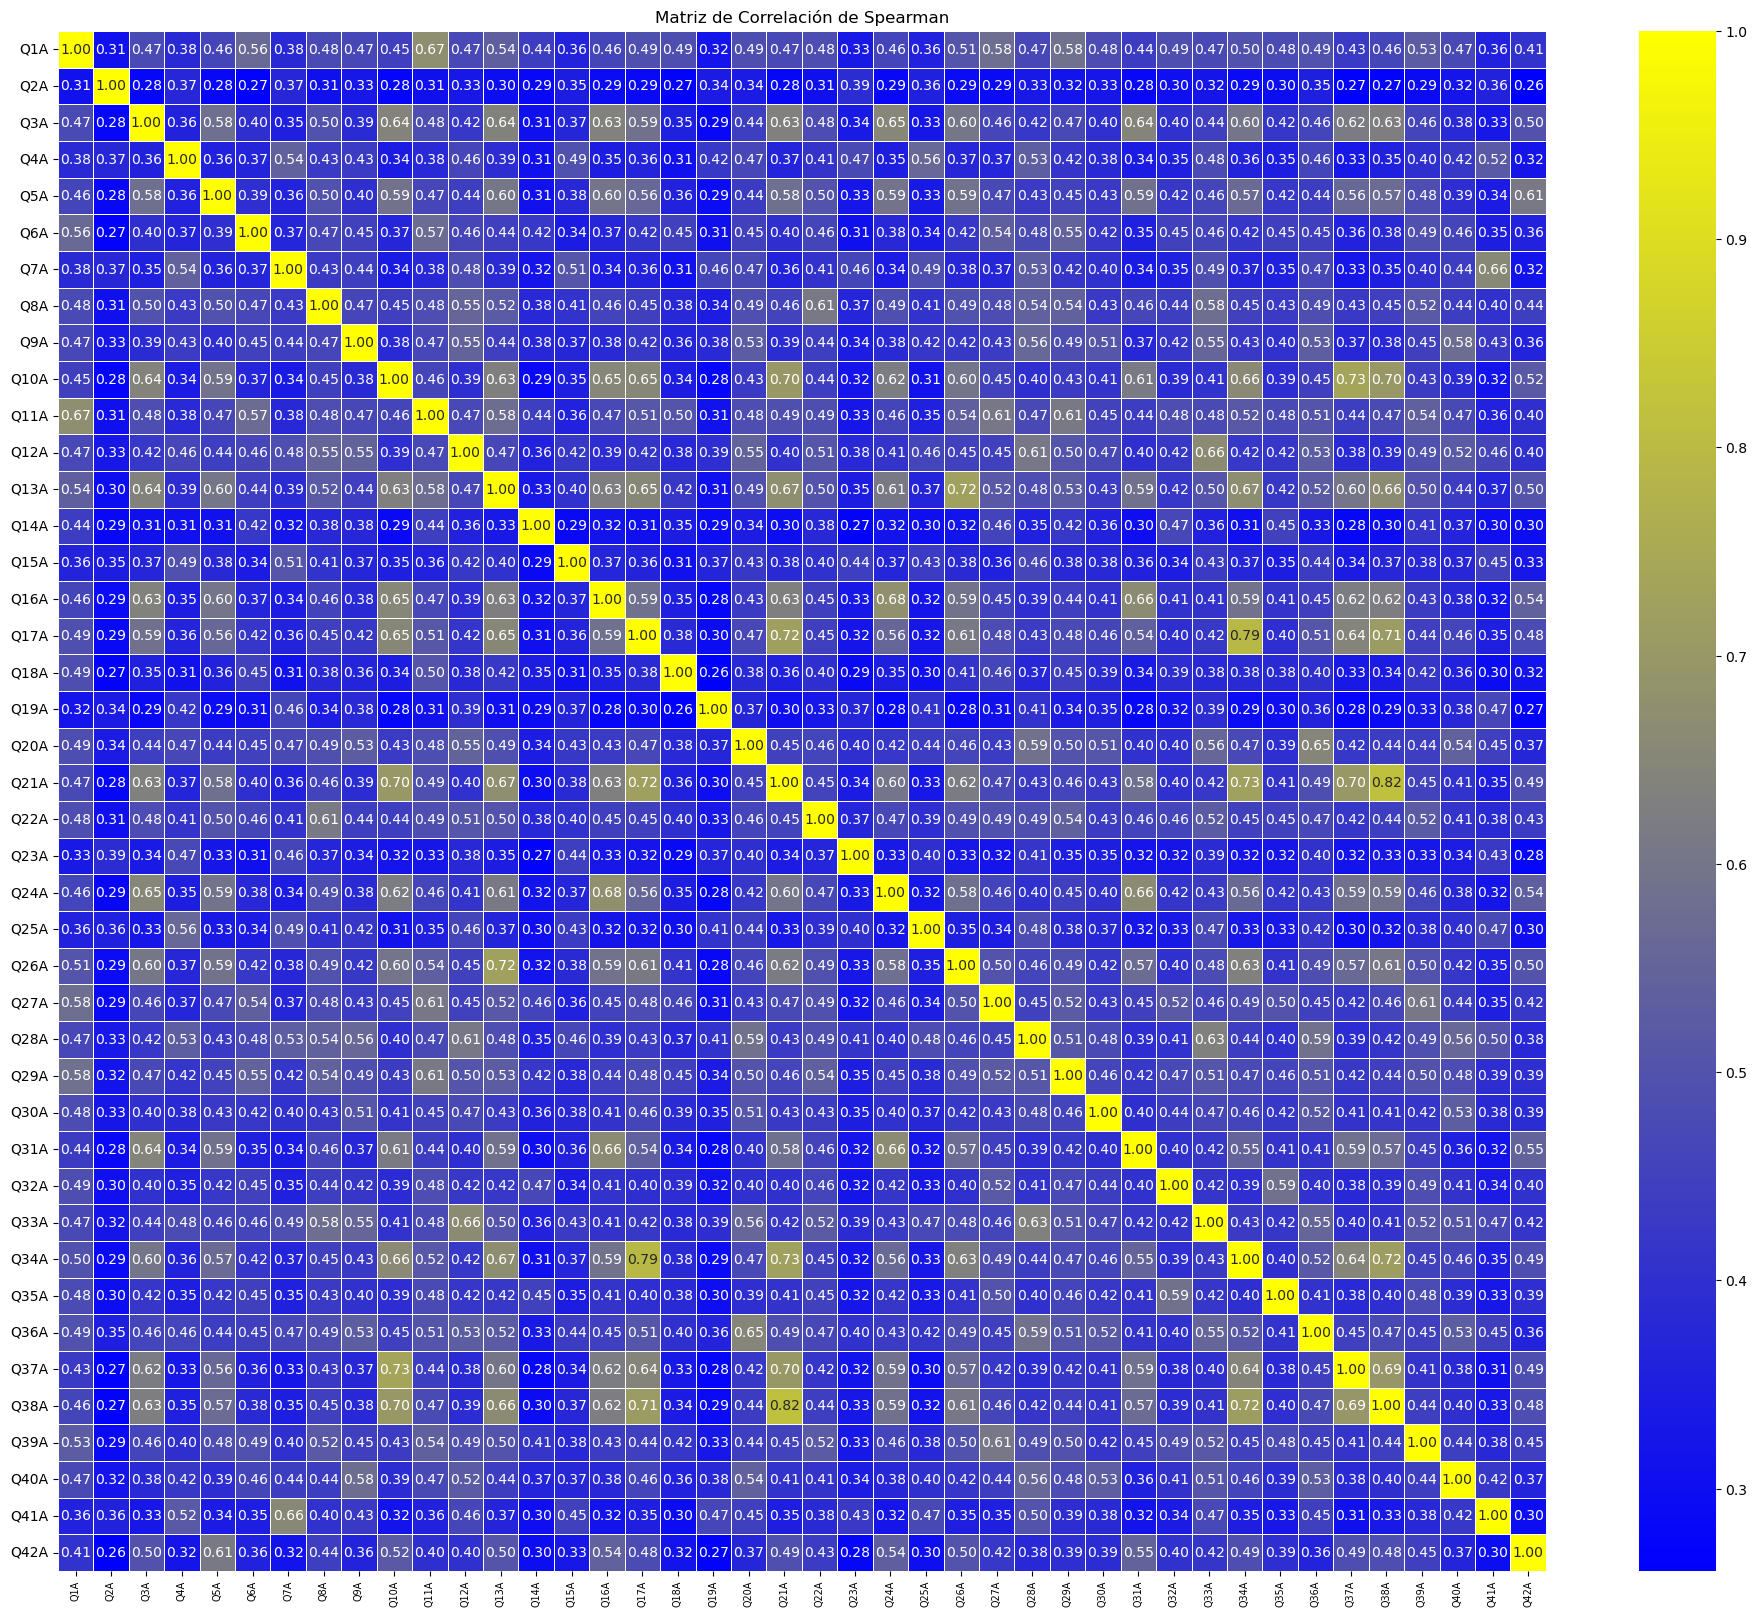

In [26]:
mapa_colores = LinearSegmentedColormap.from_list('BlueYellow', ['blue', 'yellow'])
matriz_correlacion_spearman = preguntas_A.corr(method = 'spearman')
plt.figure(figsize = (24, 20))
sns.heatmap(matriz_correlacion_spearman, annot = True, fmt = '.2f',cmap = mapa_colores, linewidths = 0.5)
plt.title('Matriz de Correlación de Spearman')
plt.xticks(fontsize = 7)
plt.show()

In [23]:
# Transformamos la matriz de correlación de Spearman en un dataframe largo
pares_correlacionados_spearman = matriz_correlacion_spearman.unstack().reset_index()
pares_correlacionados_spearman.columns = ['Pregunta 1', 'Pregunta 2', 'Correlación de Spearman']

# Vamos a eliminar las correlaciones redundantes y duplicadas
# Primero elminamos todas las filas donde pregunta 1 y 2 sean iguales (así eliminamos la correlación de cada una consigo misma)
pares_correlacionados_spearman = pares_correlacionados_spearman[pares_correlacionados_spearman['Pregunta 1'] != pares_correlacionados_spearman['Pregunta 2']]
pares_correlacionados_spearman = pares_correlacionados_spearman.drop_duplicates(subset = ['Correlación de Spearman'])

# Hay que tener en cuenta a la hora de ordenar la tabla que el valor de la correlación de Spearman puede ser positivo o negativo (o cero). Por ello ordenaremos por valor absoluto (ignorando el signo)
pares_correlacionados_spearman['Spearman en valor absoluto'] = pares_correlacionados_spearman['Correlación de Spearman'].abs()
pares_correlacionados_spearman = pares_correlacionados_spearman.sort_values(by = 'Spearman en valor absoluto', ascending = False)

fuertemente_relacionadas_spearman = pares_correlacionados_spearman.head(10)
debilmente_relacionadas_spearman = pares_correlacionados_spearman.tail(10)
print('Preguntas fuertemente correlacionadas:')
print('\n')
print(fuertemente_relacionadas_spearman)
print('\n')
print('Preguntas debilmente correlacionadas:')
print('\n')
print(debilmente_relacionadas_spearman)


Preguntas fuertemente correlacionadas:


     Pregunta 1 Pregunta 2  Correlación de Spearman  \
877        Q21A       Q38A                 0.816841   
705        Q17A       Q34A                 0.792277   
414        Q10A       Q37A                 0.734809   
873        Q21A       Q34A                 0.725559   
529        Q13A       Q26A                 0.723988   
692        Q17A       Q21A                 0.721139   
1423       Q34A       Q38A                 0.716699   
709        Q17A       Q38A                 0.709159   
398        Q10A       Q21A                 0.702259   
415        Q10A       Q38A                 0.701387   

      Spearman en valor absoluto  
877                     0.816841  
705                     0.792277  
414                     0.734809  
873                     0.725559  
529                     0.723988  
692                     0.721139  
1423                    0.716699  
709                     0.709159  
398                     0.702259  
415

## Matriz de correlación de Kendall (Tau)
Esta matriz mide la relación monotónica basada en el orden de los datos entre 2 variables: Similar en cuanto al -1, 0 y 1 pero aqui se miden las concordancias y discordancias.

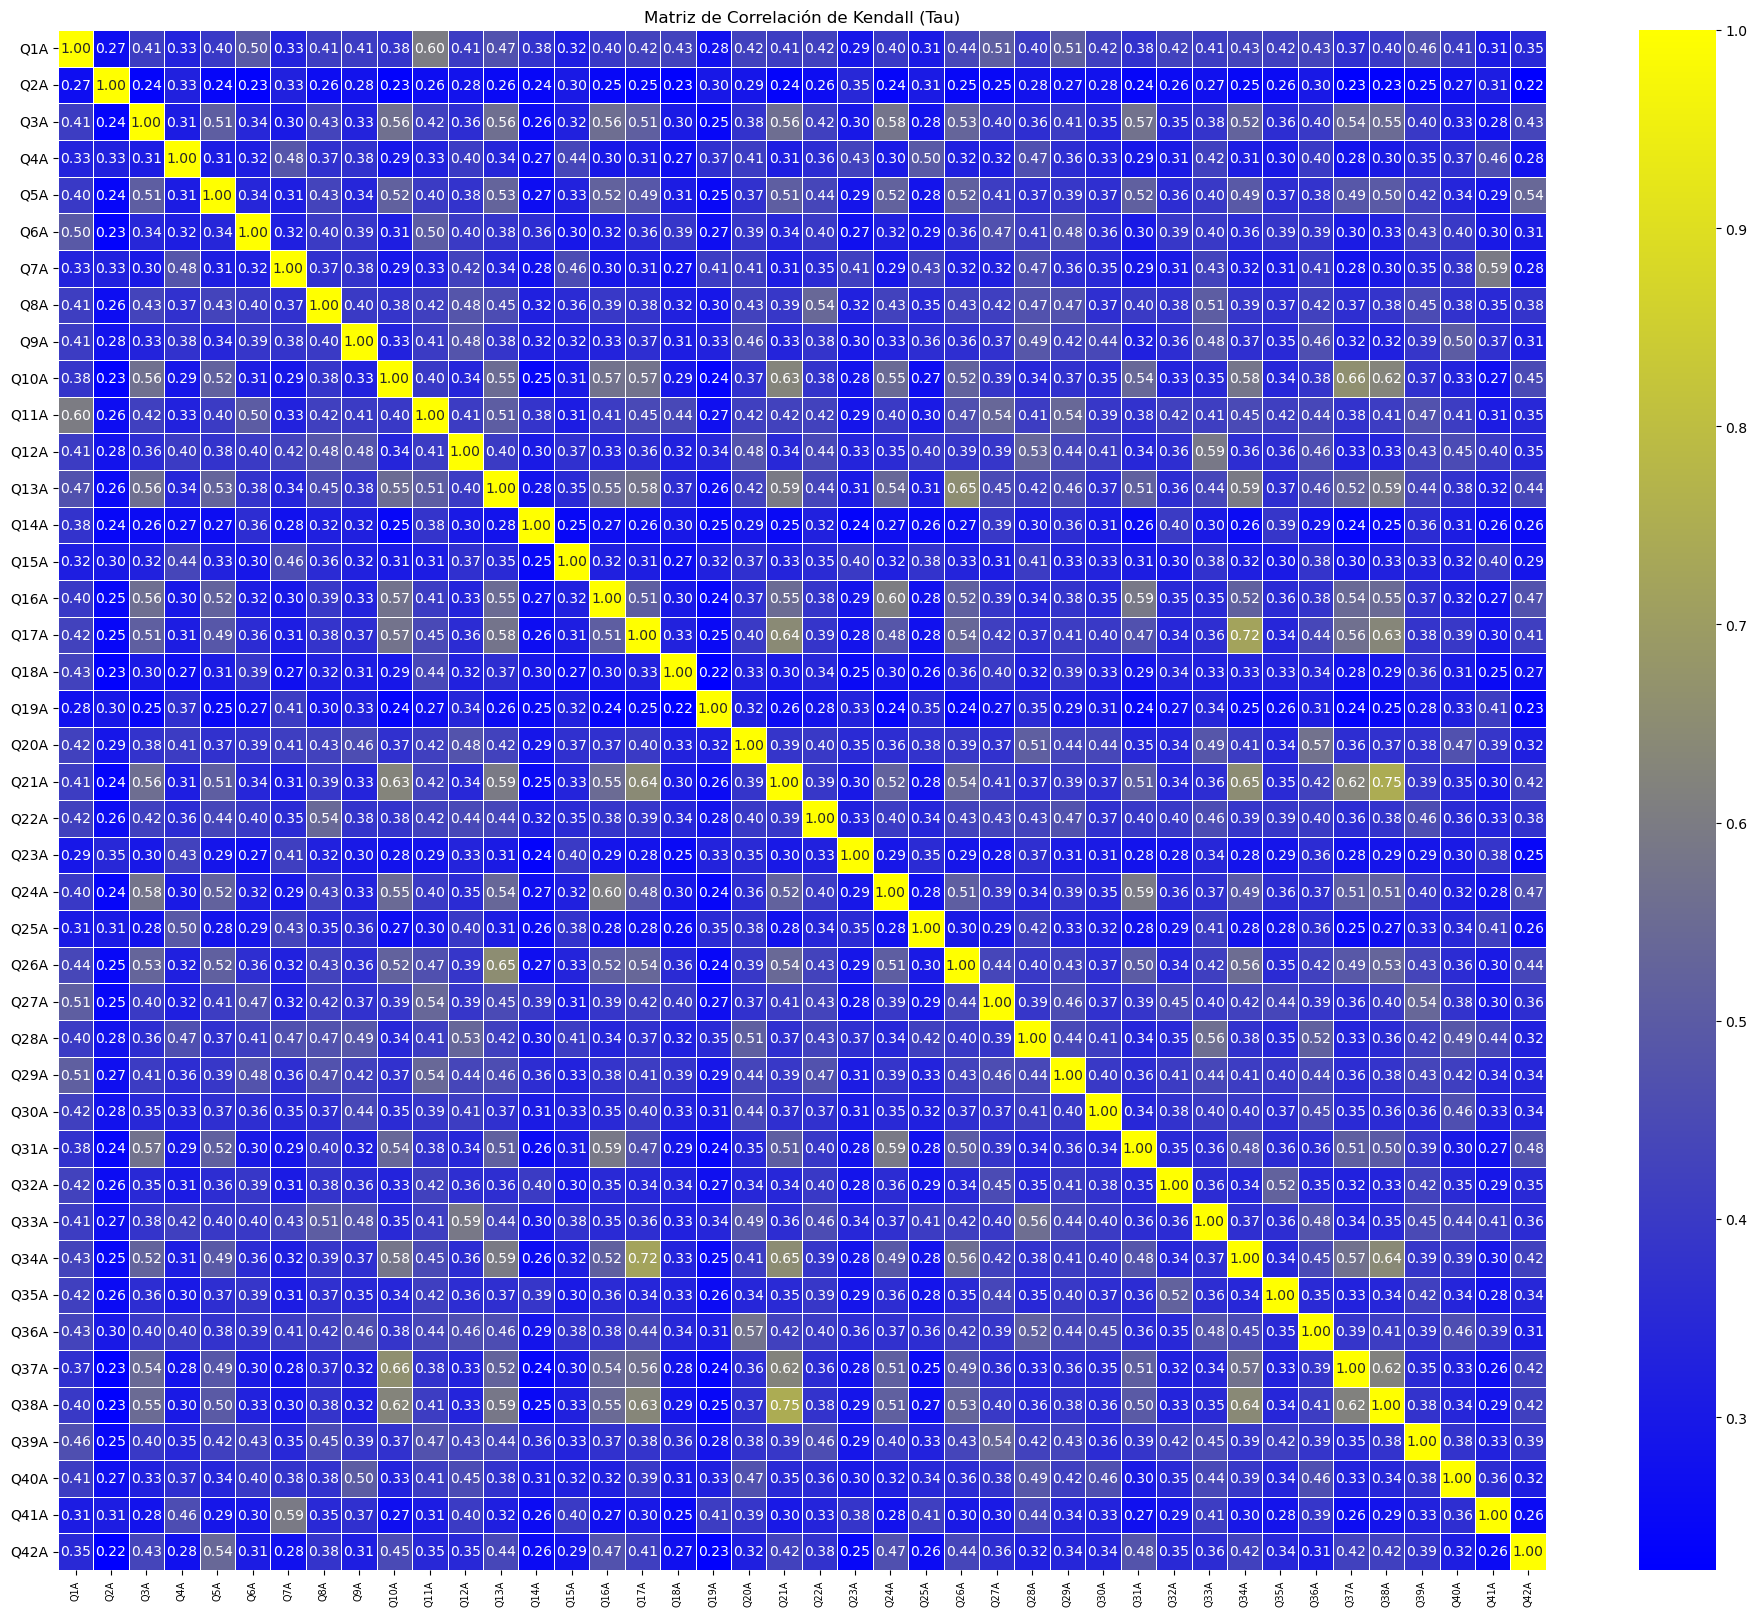

In [27]:
mapa_colores = LinearSegmentedColormap.from_list('BlueYellow', ['blue', 'yellow'])
matriz_correlacion_kendall = preguntas_A.corr(method = 'kendall')
plt.figure(figsize = (24, 20))
sns.heatmap(matriz_correlacion_kendall, annot = True, fmt = '.2f', cmap = mapa_colores, linewidths = 0.5)
plt.title('Matriz de Correlación de Kendall (Tau)')
plt.xticks(fontsize = 7)
plt.show()

In [25]:
# Transformamos la matriz de correlación de Kendall en un dataframe largo
pares_correlacionados_kendall = matriz_correlacion_kendall.unstack().reset_index()
pares_correlacionados_kendall.columns = ['Pregunta 1', 'Pregunta 2', 'Correlación de Kendall']

# Vamos a eliminar las correlaciones redundantes y duplicadas
# Primero elminamos todas las filas donde pregunta 1 y 2 sean iguales (así eliminamos la correlación de cada una consigo misma)
pares_correlacionados_kendall = pares_correlacionados_kendall[pares_correlacionados_kendall['Pregunta 1'] != pares_correlacionados_kendall['Pregunta 2']]
pares_correlacionados_kendall = pares_correlacionados_kendall.drop_duplicates(subset = ['Correlación de Kendall'])

# Hay que tener en cuenta a la hora de ordenar la tabla que el valor de la correlación de Kendall puede ser positivo o negativo (o cero). Por ello ordenaremos por valor absoluto (ignorando el signo)
pares_correlacionados_kendall['Kendall en valor absoluto'] = pares_correlacionados_kendall['Correlación de Kendall'].abs()
pares_correlacionados_kendall = pares_correlacionados_kendall.sort_values(by = 'Kendall en valor absoluto', ascending = False)

fuertemente_relacionadas_kendall = pares_correlacionados_kendall.head(10)
debilmente_relacionadas_kendall = pares_correlacionados_kendall.tail(10)
print('Preguntas fuertemente correlacionadas:')
print('\n')
print(fuertemente_relacionadas_kendall)
print('\n')
print('Preguntas debilmente correlacionadas:')
print('\n')
print(debilmente_relacionadas_kendall)


Preguntas fuertemente correlacionadas:


     Pregunta 1 Pregunta 2  Correlación de Kendall  Kendall en valor absoluto
877        Q21A       Q38A                0.747522                   0.747522
705        Q17A       Q34A                0.720704                   0.720704
414        Q10A       Q37A                0.659044                   0.659044
529        Q13A       Q26A                0.652509                   0.652509
873        Q21A       Q34A                0.648581                   0.648581
692        Q17A       Q21A                0.643094                   0.643094
1423       Q34A       Q38A                0.639974                   0.639974
709        Q17A       Q38A                0.631461                   0.631461
398        Q10A       Q21A                0.625140                   0.625140
415        Q10A       Q38A                0.624007                   0.624007


Preguntas debilmente correlacionadas:


    Pregunta 1 Pregunta 2  Correlación de Kendall  Kendall 

## Matriz de covarianza
La matriz de covarianza describe como 2 o mas variables cambian juntas. Cada elemento es la matriz indica la covarianza entre un par de variables. La covarianza se calcula de este modo:
- Se calcula la media de cada variable.
- Se halla la diferencia de cada valor con respecto a la media.
- Se multiplican las diferencias correspondientes.
- Se halla el promedio del producto de las diferencias.

Un valor positivo implica que las variables tienden a aumentar juntas, un valor negativo implica que si una aumenta la potra disminuye y un valor cero, implica que no hay una relación clara.

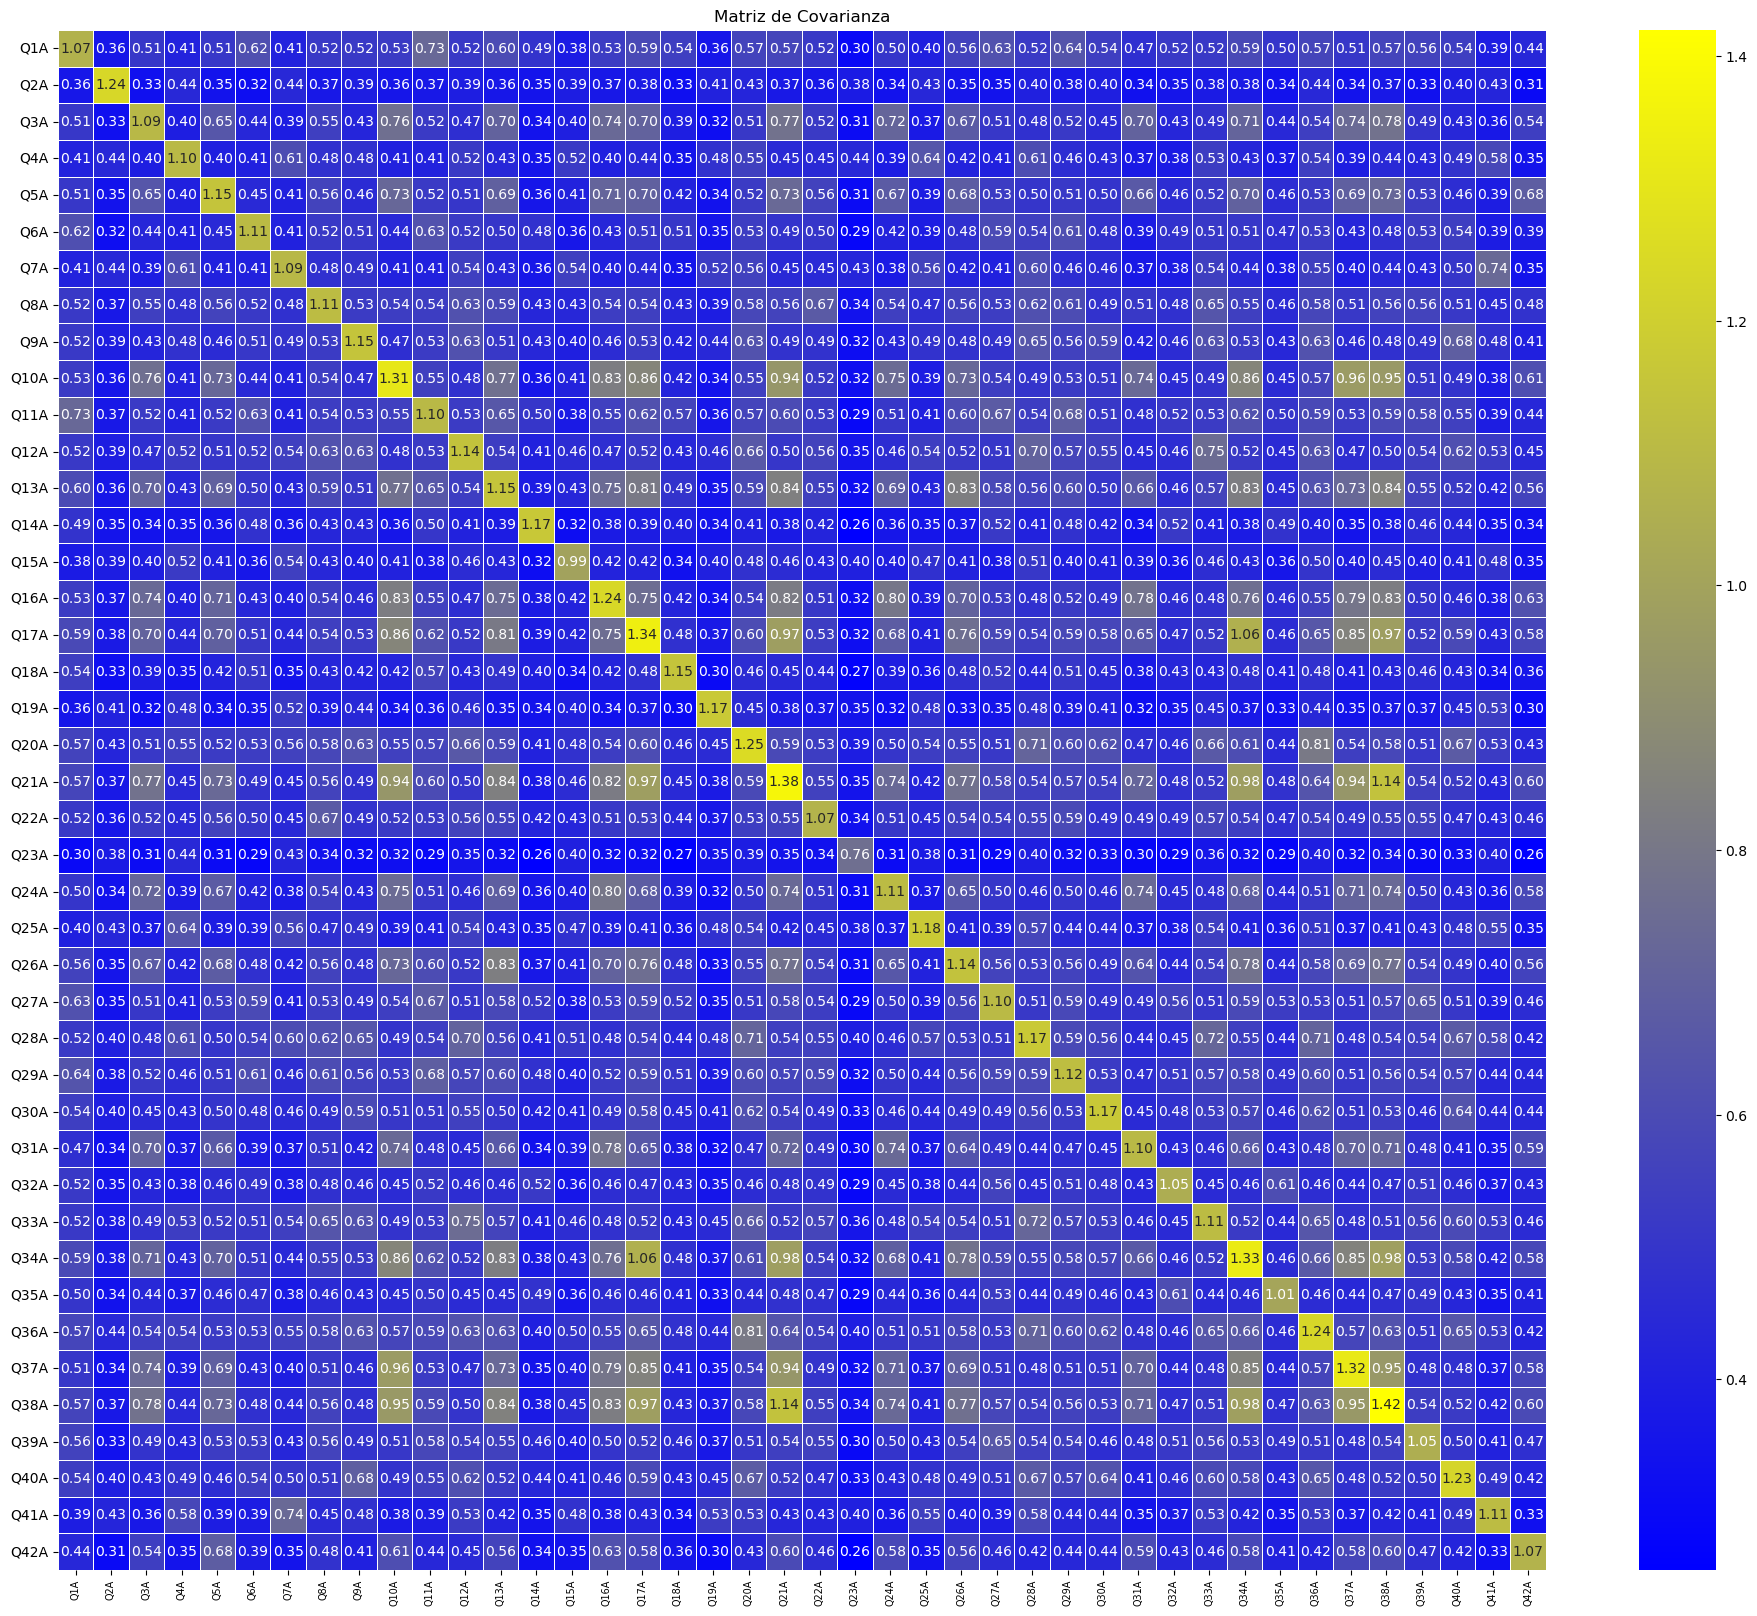

In [31]:
#Matriz de covarianza entre las preguntas del test - preguntas_A

mapa_colores = LinearSegmentedColormap.from_list('BlueYellow', ['blue', 'yellow'])
matriz_covarianza = preguntas_A.cov()
plt.figure(figsize = (24, 20))
sns.heatmap(matriz_covarianza, annot = True, fmt = '.2f',cmap = mapa_colores, linewidths = 0.5)
plt.title('Matriz de Covarianza')
plt.xticks(fontsize = 7)
plt.show()

- Vamos a generar 2 tablas, una con las variables que presentan un valor mas alto de covarianza, ya sea positiva o negativa y otra tabla con las variables con menor covarianza.
- Adicionalmente vamos a crear una tabla con todas las filas donde pregunta 1 y 2 sean iguales, ya que representa la diagonal, que contiene la varianza y nos habla de la dispersión de los valores de esa variable. También interesa graficarla.

In [45]:
# Transformamos la matriz de covarianza en un dataframe largo
matriz_covarianza = pd.DataFrame(matriz_covarianza)
pares_covarianza = matriz_covarianza.unstack().reset_index()
pares_covarianza.columns = ['Pregunta 1', 'Pregunta 2', 'Covarianza']

# Vamos a eliminar las correlaciones redundantes y duplicadas
# Vamos a crear una tabla con todas las filas donde pregunta 1 y 2 sean iguales, ya que representa la diagonal, que contiene la varianza y nos habla de la dispersión de los valores de esa variable. También interesa graficarla.
varianza = pares_covarianza[pares_covarianza['Pregunta 1'] == pares_covarianza['Pregunta 2']]
pares_covarianza = pares_covarianza[pares_covarianza['Pregunta 1'] != pares_covarianza['Pregunta 2']]
pares_covarianza = pares_covarianza.drop_duplicates(subset = ['Covarianza'])

# Hay que tener en cuenta a la hora de ordenar la tabla que el valor de la correlación de Kendall puede ser positivo o negativo (o cero). Por ello ordenaremos por valor absoluto (ignorando el signo)
pares_covarianza['Covarianza en valor absoluto'] = pares_covarianza['Covarianza'].abs()
pares_covarianza = pares_covarianza.sort_values(by = 'Covarianza en valor absoluto', ascending = False)

alta_covarianza = pares_covarianza.head(10)
baja_covarianza = pares_covarianza.tail(10)
print('Preguntas con alta covarianza:')
print('\n')
print(alta_covarianza)
print('\n')
print('Preguntas con baja covarianza:')
print('\n')
print(baja_covarianza)


Preguntas con alta covarianza:


     Pregunta 1 Pregunta 2  Covarianza  Covarianza en valor absoluto
877        Q21A       Q38A    1.142421                      1.142421
705        Q17A       Q34A    1.059104                      1.059104
1423       Q34A       Q38A    0.981294                      0.981294
873        Q21A       Q34A    0.976955                      0.976955
692        Q17A       Q21A    0.974988                      0.974988
709        Q17A       Q38A    0.974718                      0.974718
414        Q10A       Q37A    0.963037                      0.963037
415        Q10A       Q38A    0.954781                      0.954781
1549       Q37A       Q38A    0.949077                      0.949077
876        Q21A       Q37A    0.942129                      0.942129


Preguntas con baja covarianza:


    Pregunta 1 Pregunta 2  Covarianza  Covarianza en valor absoluto
962       Q23A       Q39A    0.297417                      0.297417
954       Q23A       Q31A    0.295774

In [46]:
# Arreglamos la tabla de varianzas
# Dado que hemos obtenido la tabla de varianzas de la diagonal, pregunta 1 y 2 son la misma así que eliminamos una de las columnas. Cambiamos el nombre de las columnas.
varianza = varianza.drop(columns = ['Pregunta 2'])
varianza = varianza.rename(columns = {'Pregunta 1' : 'Pregunta', 'Covarianza' : 'Varianza'})
varianza = varianza.reset_index(drop = True)
varianza

Pregunta  Varianza
0       Q1A  1.068336
1       Q2A  1.237201
2       Q3A  1.094156
3       Q4A  1.099161
4       Q5A  1.151315
5       Q6A  1.110569
6       Q7A  1.093167
7       Q8A  1.113752
8       Q9A  1.148452
9      Q10A  1.306940
10     Q11A  1.101619
11     Q12A  1.143745
12     Q13A  1.150248
13     Q14A  1.166090
14     Q15A  0.993693
15     Q16A  1.241497
16     Q17A  1.342874
17     Q18A  1.147839
18     Q19A  1.170108
19     Q20A  1.254154
20     Q21A  1.375392
21     Q22A  1.072260
22     Q23A  0.763936
23     Q24A  1.110380
24     Q25A  1.175874
25     Q26A  1.140779
26     Q27A  1.103795
27     Q28A  1.174189
28     Q29A  1.123746
29     Q30A  1.167458
30     Q31A  1.101462
31     Q32A  1.046942
32     Q33A  1.112067
33     Q34A  1.328344
34     Q35A  1.006443
35     Q36A  1.237744
36     Q37A  1.315492
37     Q38A  1.419989
38     Q39A  1.047309
39     Q40A  1.228244
40     Q41A  1.114952
41     Q42A  1.071528

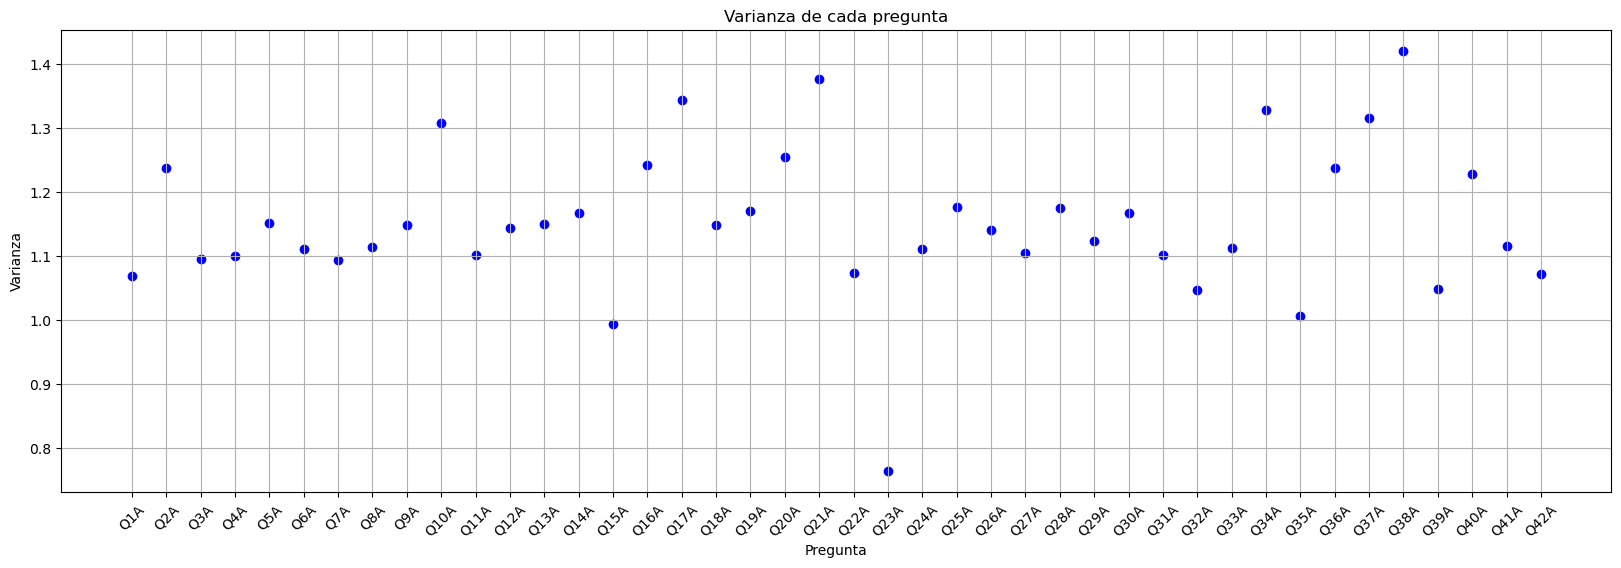

In [50]:
plt.figure(figsize = (20, 6))
plt.scatter(varianza['Pregunta'], varianza['Varianza'] , color = 'b')
plt.title('Varianza de cada pregunta')
plt.xlabel('Pregunta')
plt.ylabel('Varianza')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

## Matriz de precisión.
- Se llama también matriz de concentración o inversa de la matriz de covarianza. Da información sobre la relación entre 2 variables eliminando el efecto de las otras.

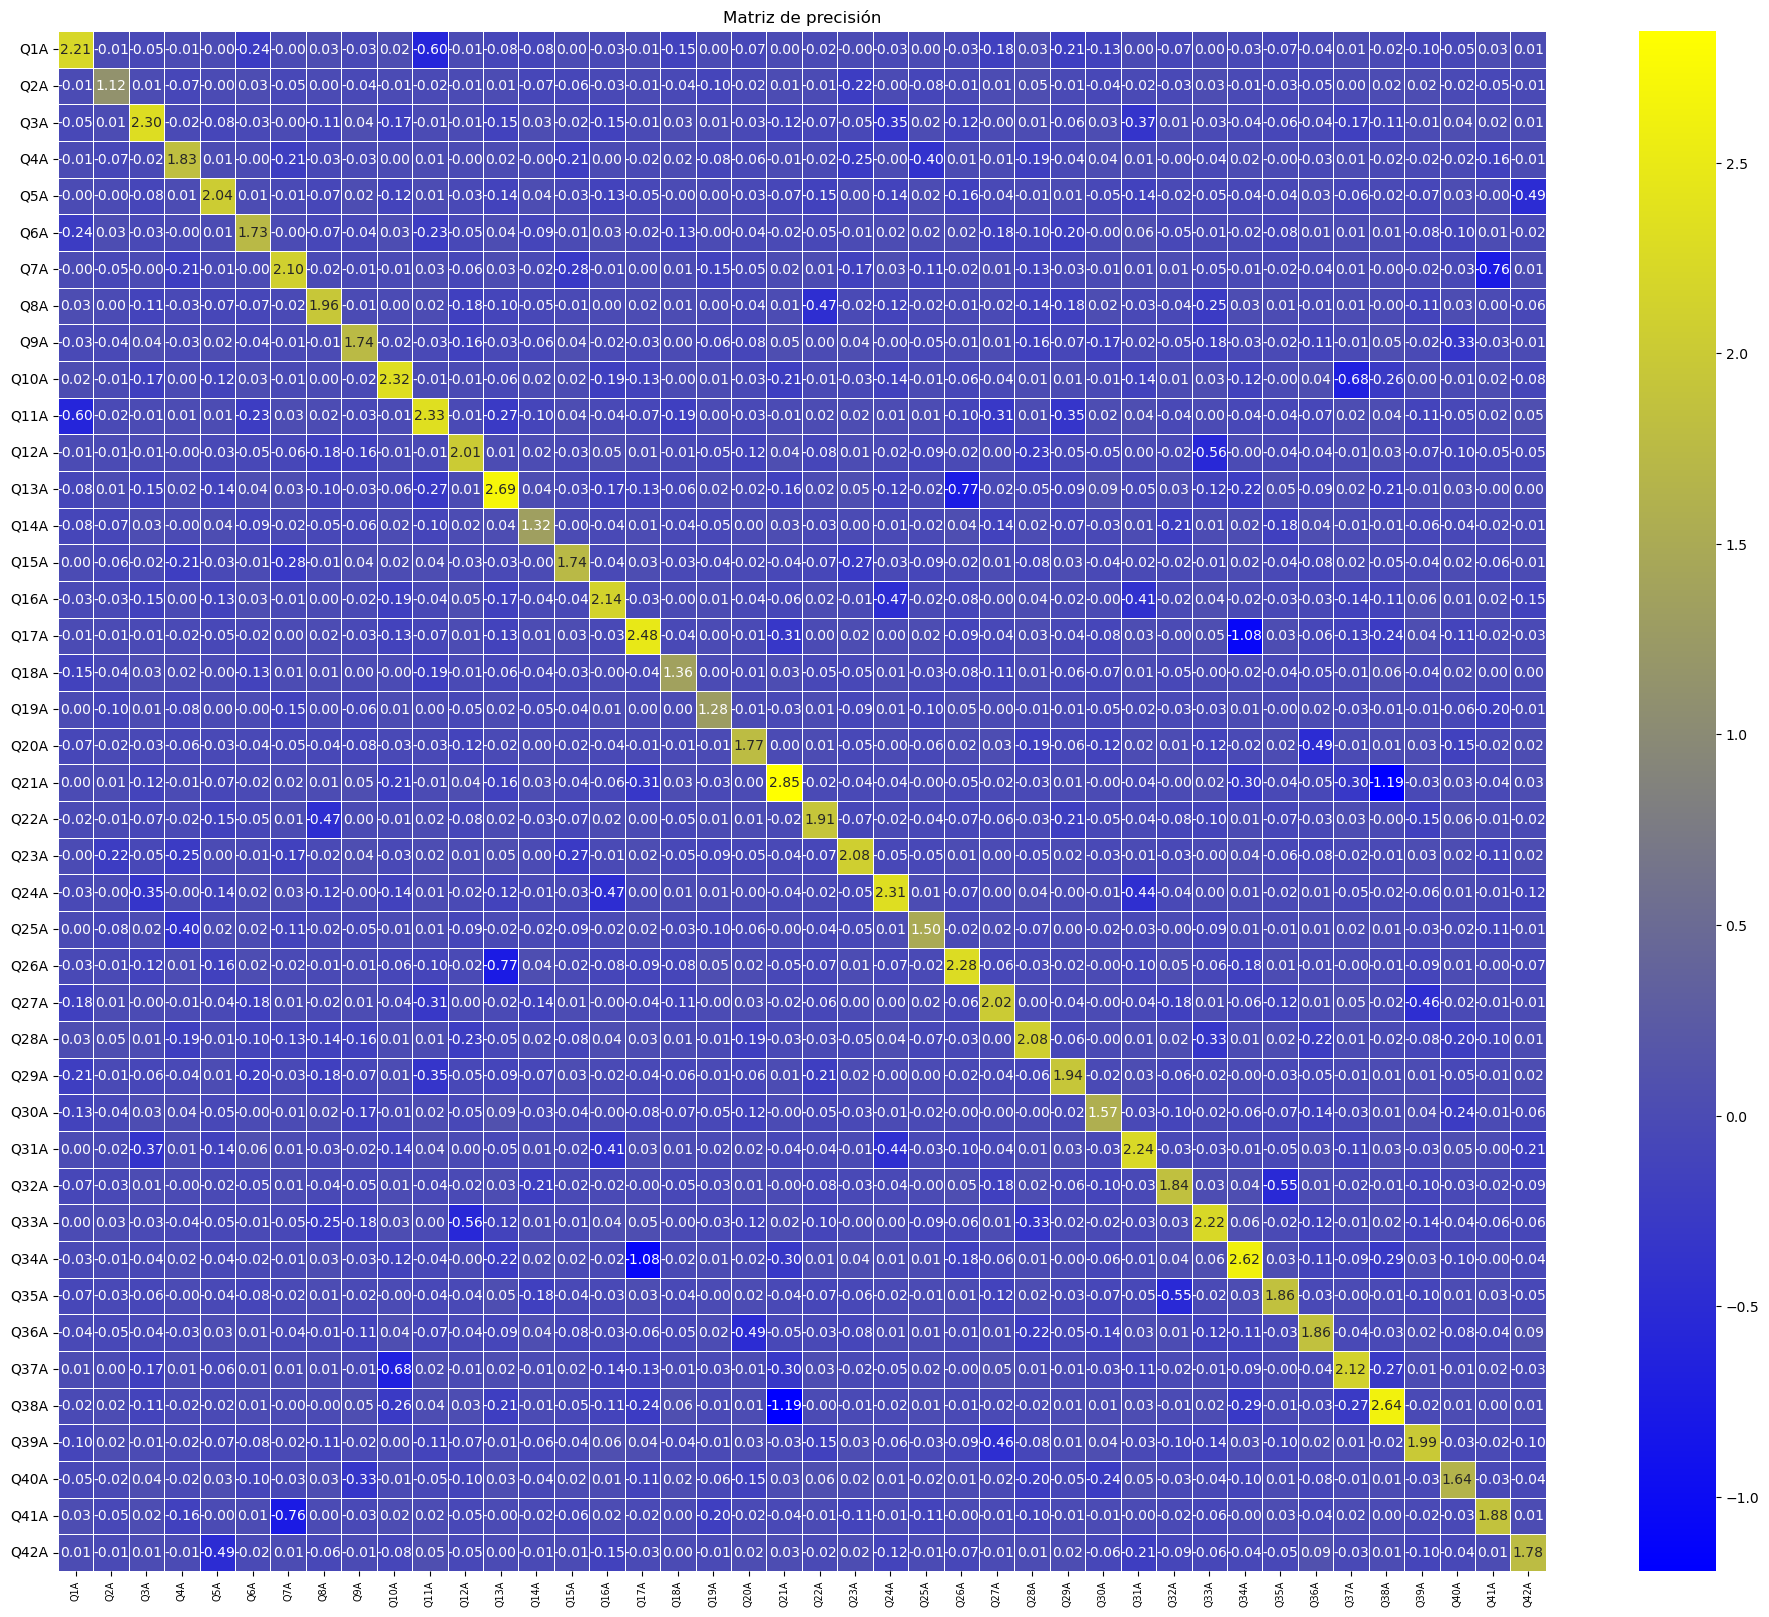

In [51]:
# La matriz de precisión es la inversa a la matriz de covarianza, por lo tabnto se calcula primero la de covarianza.
mapa_colores = LinearSegmentedColormap.from_list('BlueYellow', ['blue', 'yellow'])
matriz_covarianza = preguntas_A.cov()

# Calculamos la inversa de la matriz de covarianza
# linalg es una librería de numpy que tiene funciones de algebra lineal. En este caso usamos inv() que calcula la inversa de una matriz cuadrada
matriz_precision = np.linalg.inv(matriz_covarianza)

# Convertimos a dataframe
matriz_precision = pd.DataFrame(matriz_precision, index = matriz_covarianza.index, columns = matriz_covarianza.columns)

plt.figure(figsize = (24, 20))
sns.heatmap(matriz_precision, annot = True, fmt = '.2f',cmap = mapa_colores, linewidths = 0.5)
plt.title('Matriz de precisión')
plt.xticks(fontsize = 7)
plt.show()

- Aunque en las gráficas de la matrices de correlación y covarianza parecía que había mas relación entre preguntas, con la matriz de precisión y su gráfica se ve facilmente que hay muchas preguntas que no tienen relación directa entre si. Su relación que se mostraba en las otras matrices era por su relación con terceras preguntas. Teniendo la matriz de covarianza y esta que es su inversa podemos sacar mucha información sobre la pregubtas y de aquí se podría empezar a pensar si merece la pena reducir dimensionalidad o no.

In [52]:
# Transformamos la matriz de precisión en un dataframe largo
pares_precision = matriz_precision.unstack().reset_index()
pares_precision.columns = ['Pregunta 1', 'Pregunta 2', 'Precisión']

# Vamos a eliminar las correlaciones redundantes y duplicadas
pares_precision = pares_precision[pares_precision['Pregunta 1'] != pares_precision['Pregunta 2']]
pares_precision = pares_precision.drop_duplicates(subset = ['Precisión'])

# Hay que tener en cuenta a la hora de ordenar la tabla que el valor de la correlación de Kendall puede ser positivo o negativo (o cero). Por ello ordenaremos por valor absoluto (ignorando el signo)
pares_precision['Precisión en valor absoluto'] = pares_precision['Precisión'].abs()
pares_precision = pares_precision.sort_values(by = 'Precisión en valor absoluto', ascending = False)

alta_precision = pares_precision.head(10)
baja_precision = pares_precision.tail(10)
print('Preguntas con alta precisión:')
print('\n')
print(alta_precision)
print('\n')
print('Preguntas con baja precisión:')
print('\n')
print(baja_precision)


Preguntas con alta precisión:


     Pregunta 1 Pregunta 2  Precisión  Precisión en valor absoluto
1574       Q38A       Q21A  -1.193988                     1.193988
877        Q21A       Q38A  -1.193988                     1.193988
705        Q17A       Q34A  -1.077602                     1.077602
1402       Q34A       Q17A  -1.077602                     1.077602
1062       Q26A       Q13A  -0.765399                     0.765399
529        Q13A       Q26A  -0.765399                     0.765399
1686       Q41A        Q7A  -0.759064                     0.759064
292         Q7A       Q41A  -0.759064                     0.759064
414        Q10A       Q37A  -0.683258                     0.683258
1521       Q37A       Q10A  -0.683258                     0.683258


Preguntas con baja precisión:


     Pregunta 1 Pregunta 2  Precisión  Precisión en valor absoluto
790        Q19A       Q35A  -0.000220                     0.000220
1446       Q35A       Q19A  -0.000220                     0.000